In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn import linear_model

**Problem Statement :** We have a list of people with theirs industry experience and their salaries. Our aim is to predict the salary of a persons when their experience is given 

In [3]:
salary_data = pd.read_csv('Salary_Data.csv')
salary_data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [5]:
salary_data.shape

(30, 2)

In [6]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [17]:
trace = go.Scatter(x=salary_data['YearsExperience'], y=salary_data['Salary'], mode = 'markers', marker = dict(size=10,color='green'))
layout = go.Layout(title="Salary Distribution", xaxis_title='Year of Experience', yaxis_title = 'Salary')
fig = go.Figure(data = trace, layout = layout)
fig.show()

In [20]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [24]:
train_data = salary_data.iloc[0:20,:]
train_data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [25]:
test_data = salary_data.iloc[20:,:]
test_data

,YearsExperience,Salary
20,6.8,91738
21,7.1,98273
22,7.9,101302
23,8.2,113812
24,8.7,109431
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [26]:
X_train = train_data[['YearsExperience']]
y_train = train_data[['Salary']]
X_test = test_data[['YearsExperience']]
y_test = test_data[['Salary']]

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20, 1)
(10, 1)
(10, 1)


In [28]:
reg_obj = linear_model.LinearRegression()
reg_obj.fit(X_train,y_train)

LinearRegression()

In [29]:
reg_obj.coef_

array([[9116.11420069]])

In [30]:
reg_obj.intercept_

array([26577.40001951])

In [34]:
predicted_salaries = reg_obj.predict(X_test)
predicted_salaries

array([[ 88566.97658422],
       [ 91301.81084443],
       [ 98594.70220499],
       [101329.53646519],
       [105887.59356554],
       [108622.42782575],
       [113180.48492609],
       [114092.09634616],
       [120473.37628665],
       [122296.59912679]])

In [40]:
comparision_df = y_test
comparision_df['predicted_salaries'] = predicted_salaries

In [41]:
comparision_df

,index,Salary,predicted_salaries
0,20,91738,88566.976584
1,21,98273,91301.810844
2,22,101302,98594.702205
3,23,113812,101329.536465
4,24,109431,105887.593566
5,25,105582,108622.427826
6,26,116969,113180.484926
7,27,112635,114092.096346
8,28,122391,120473.376287
9,29,121872,122296.599127


In [49]:
from sklearn.metrics import r2_score
r2_score_err = r2_score(comparision_df['Salary'],comparision_df['predicted_salaries'])
print(r2_score_err)

0.7154263893579006


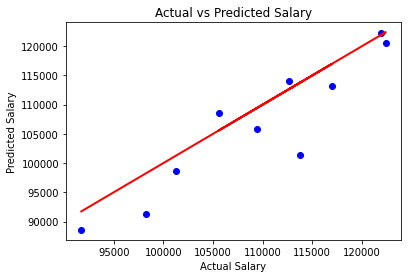

In [51]:
# Plot actual vs predicted
plt.scatter(comparision_df['Salary'], predicted_salaries, color='blue')
plt.plot(comparision_df['Salary'], comparision_df['Salary'], color='red', linewidth=2)  # Plotting the line y = x
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

In [ ]:
log_reg = linear_model.LogisticRegression()
log_reg.fit()
